# Na analysis (run 3609)

In [55]:
from __future__ import print_function, division
%load_ext autoreload
%autoreload 2
import os
import operator
import functools
import textwrap
import copy
import time
import glob
import math
print("Running on ", time.asctime())

import textwrap
import numpy as np
import pandas as pd
import tables as tb
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

import invisible_cities.database.load_db as DB
import invisible_cities.core.system_of_units_c as SystemOfUnits
import invisible_cities.reco.pmaps_functions as pmapf
import invisible_cities.core.fit_functions as fitf

from invisible_cities.core.core_functions import timefunc, flat
from invisible_cities.reco.pmaps_functions import width, integrate_charge
from icaro.core.hst_functions import labels, hist, doublehist, hist2d, pdf, scatter, profile_and_scatter,\
                              doublescatter, covariance, reso, gausstext, plot_profile_histogram 

from icaro.core.kdst_functions import load_dst, event_rate
DataPMT = DB.DataPMT()
DataSiPM = DB.DataSiPM()
units = SystemOfUnits.SystemOfUnits()
pi = np.pi


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Running on  Sat Apr  8 13:41:03 2017


#### General plotting options

In [2]:
plt.rcParams["figure.figsize"]          = 6, 6
plt.rcParams["font.size"]               = 15
plt.rcParams["figure.max_open_warning"] = 100

profOpt = "--k"
fitOpt  = "r"

outputfolder = "plots/"
if not os.path.exists(outputfolder):
    os.mkdir(outputfolder)

#### Useful functions

In [5]:
save = functools.partial(save_to_folder, outputfolder)

### Run

In [7]:
run_number = 3609

### Input data

In [17]:
# Comment out this line if your data is in $IC_DATA
#ifile = os.path.expandvars("/Users/Gonzalo/github/NEXTdata/Na22/Na22DST.h5")
ifile = os.path.join(os.environ['IC_DATA'],
                        'LSC/kdst/{}/kdst_3609_135_479.h5'.format(run_number))
print("ifile:", ifile)

ifile: /Users/jjgomezcadenas/Projects/ICDATA/LSC/kdst/3609/kdst_3609_135_479.h5


# Read data

In [18]:
full = load_dst(ifile)
full.head()

,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,22141,1.491517e+09,0,1,175.0,13.954955,72.239815,624025.0,18.015812,16397.771484,...,659462.5,26.0,35.4375,35.4375,-141.485719,-4.030394,141.543113,-3.113114,10.746290,9.177835
1,22143,1.491517e+09,0,2,175.0,14.436388,73.639985,570075.0,16.071250,8490.367188,...,659187.5,19.0,89.1125,89.1125,-97.569578,22.380145,100.103414,2.916117,8.997476,9.208689
2,22143,1.491517e+09,1,2,175.0,14.436388,73.639985,570075.0,7.319375,1538.694702,...,676287.5,2.0,106.2125,106.2125,-119.837734,25.000000,122.417656,2.935927,5.021407,0.000000
3,22144,1.491517e+09,0,2,300.0,25.215143,152.466999,565475.0,19.281437,13409.538086,...,655262.5,30.0,89.7875,89.7875,54.959338,-26.589229,61.053386,-0.450602,10.232118,10.337627
4,22144,1.491517e+09,1,2,300.0,25.215143,152.466999,565475.0,8.328125,4597.053711,...,681487.5,8.0,116.0125,116.0125,36.625278,13.021865,38.871326,0.341604,6.569558,6.368801


### Trigger rate and z distribution 

In [19]:
r = event_rate(full)

In [20]:
print("Trigger rate: {} evts/s".format(r))

Trigger rate: 1.3820128249716164 evts/s


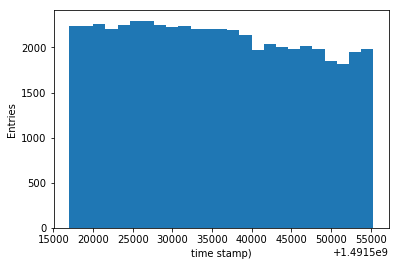

In [132]:
hist(full.time, 25)
labels("time stamp)", "Entries")

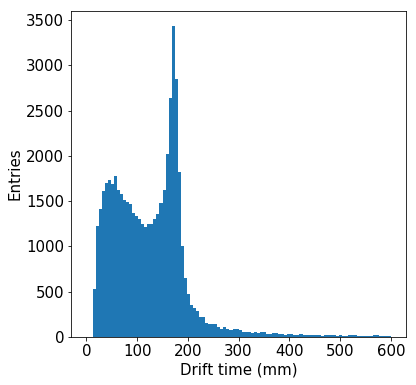

In [23]:
hist(full.Z, 100, (0,600))
labels("Drift time (mm)", "Entries")

#### NB very visible position of the source

### Raw S2

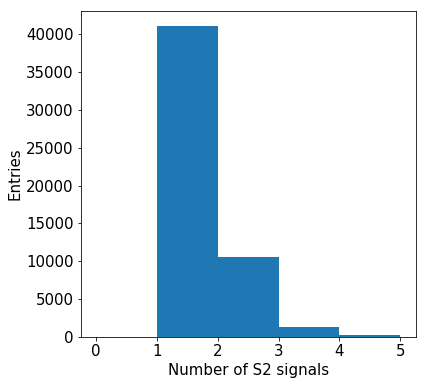

In [24]:
hist(full.nS2, 5, (0,5))
labels("Number of S2 signals", "Entries")

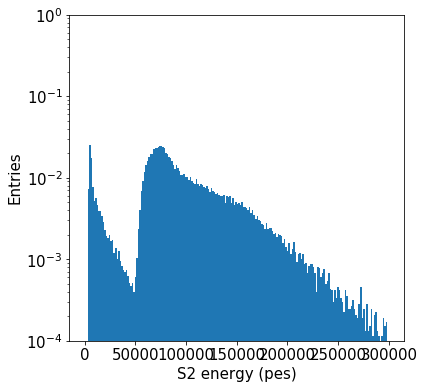

In [25]:
pdf(full.S2e, 200, (0,3e5))
labels("S2 energy (pes)", "Entries")

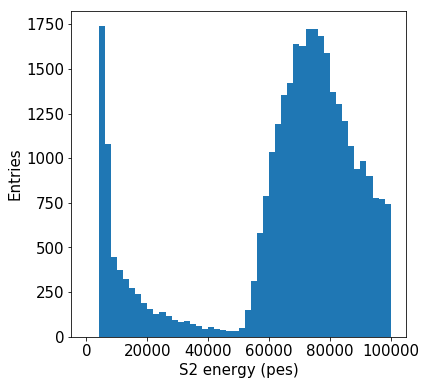

In [26]:
hist(full.S2e, 50, (0e3,1e5))
labels("S2 energy (pes)", "Entries")

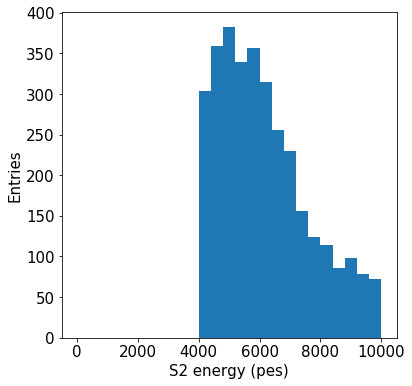

In [27]:
n, bins, patches  = hist(full.S2e, 25, (0,1e4))
labels("S2 energy (pes)", "Entries")

### S1

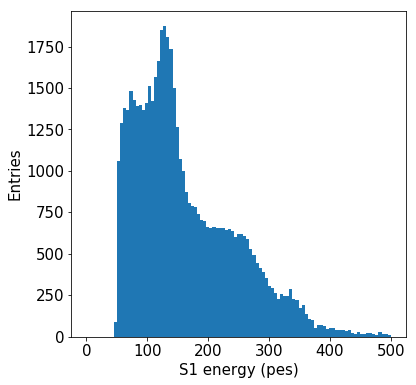

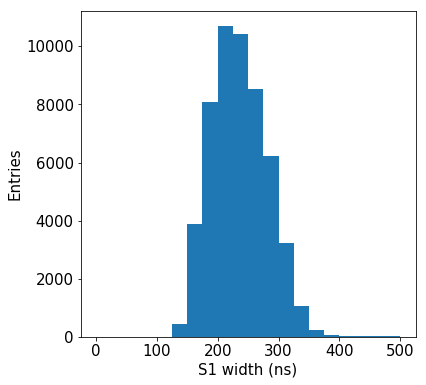

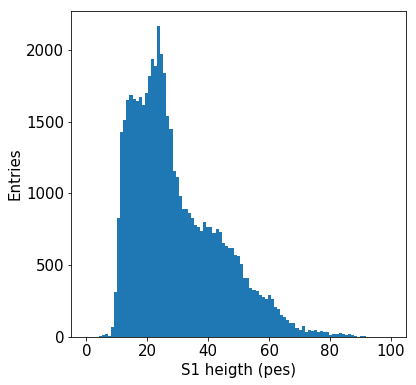

In [29]:
bins = np.linspace(0, 500, 100)
n, bins, patches  = hist(full.S1e, bins)
labels("S1 energy (pes)", "Entries")

bins = np.linspace(0, 500, 21)
n, bins, patches  = hist(full.S1w, bins)
labels("S1 width (ns)", "Entries")

bins = np.linspace(0, 100, 100)
n, bins, patches  =  hist(full.S1h, bins)
labels("S1 heigth (pes)", "Entries")

### S2 energy vs Z

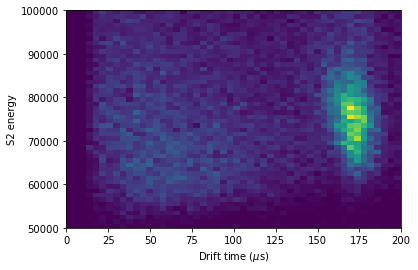

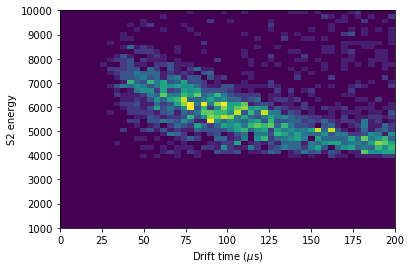

In [81]:
zrange =   0, 200
Erange = 50e3, 1e5
hist2d(full.Z, full.S2e, (50, 50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")


Erange =  1e3, 1e4
hist2d(full.Z, full.S2e, (50, 50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")

### S1 energy vs Z

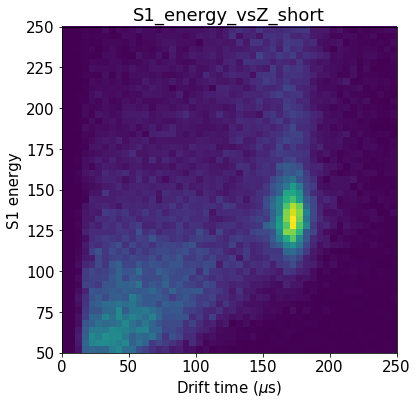

In [37]:
zrange =   0, 250
Erange = 50, 250
hist2d(full.Z, full.S1e, (50, 50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S1 energy")
save("S1_energy_vsZ_short")

### S1 vs S2

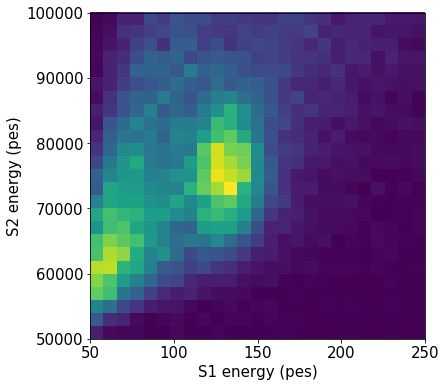

In [42]:
zrange =   0, 250
S1range = 50, 250
S2range = 50e3, 1e5
hist2d(full.S1e, full.S2e, (25, 25), range=(S1range, S2range))
labels("S1 energy (pes)", "S2 energy (pes)")
#save("S1_energy_vs_S2_energy_short")

In [133]:
s1pe = full[full.S1e > 100]
print("Ratio:", len(s1pe)/len(full))
shortZ.head()

Ratio: 0.7479159594130739


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,22141,1.491517e+09,0,1,175.0,13.954955,72.239815,624025.0,18.015812,16397.771484,...,659462.5,26.0,35.4375,35.4375,-141.485719,-4.030394,141.543113,-3.113114,10.746290,9.177835
1,22143,1.491517e+09,0,2,175.0,14.436388,73.639985,570075.0,16.071250,8490.367188,...,659187.5,19.0,89.1125,89.1125,-97.569578,22.380145,100.103414,2.916117,8.997476,9.208689
2,22143,1.491517e+09,1,2,175.0,14.436388,73.639985,570075.0,7.319375,1538.694702,...,676287.5,2.0,106.2125,106.2125,-119.837734,25.000000,122.417656,2.935927,5.021407,0.000000
3,22144,1.491517e+09,0,2,300.0,25.215143,152.466999,565475.0,19.281437,13409.538086,...,655262.5,30.0,89.7875,89.7875,54.959338,-26.589229,61.053386,-0.450602,10.232118,10.337627
4,22144,1.491517e+09,1,2,300.0,25.215143,152.466999,565475.0,8.328125,4597.053711,...,681487.5,8.0,116.0125,116.0125,36.625278,13.021865,38.871326,0.341604,6.569558,6.368801


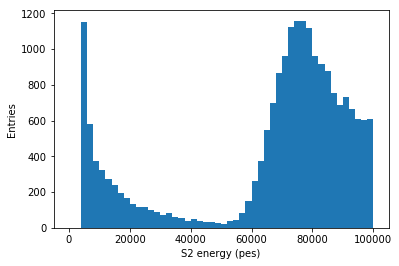

In [134]:
hist(s1pe.S2e, 50, (0e3,1e5))
labels("S2 energy (pes)", "Entries")

# Short drift time: Z < 300 $\mu$s

In [44]:
shortZ = full[full.Z < 300]
print("Ratio:", len(shortZ)/len(full))
shortZ.head()

Ratio: 0.9719927577232093


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
0,22141,1.491517e+09,0,1,175.0,13.954955,72.239815,624025.0,18.015812,16397.771484,...,659462.5,26.0,35.4375,35.4375,-141.485719,-4.030394,141.543113,-3.113114,10.746290,9.177835
1,22143,1.491517e+09,0,2,175.0,14.436388,73.639985,570075.0,16.071250,8490.367188,...,659187.5,19.0,89.1125,89.1125,-97.569578,22.380145,100.103414,2.916117,8.997476,9.208689
2,22143,1.491517e+09,1,2,175.0,14.436388,73.639985,570075.0,7.319375,1538.694702,...,676287.5,2.0,106.2125,106.2125,-119.837734,25.000000,122.417656,2.935927,5.021407,0.000000
3,22144,1.491517e+09,0,2,300.0,25.215143,152.466999,565475.0,19.281437,13409.538086,...,655262.5,30.0,89.7875,89.7875,54.959338,-26.589229,61.053386,-0.450602,10.232118,10.337627
4,22144,1.491517e+09,1,2,300.0,25.215143,152.466999,565475.0,8.328125,4597.053711,...,681487.5,8.0,116.0125,116.0125,36.625278,13.021865,38.871326,0.341604,6.569558,6.368801


# S2 energy

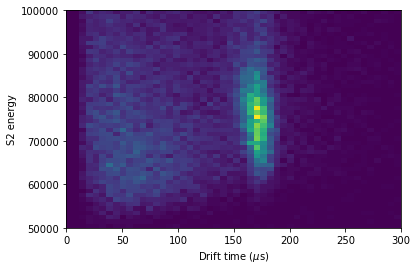

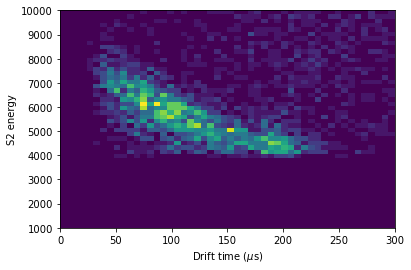

In [102]:
zrange =   0, 300
Erange = 50e3, 1e5
hist2d(shortZ.Z, shortZ.S2e, (50, 50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")


Erange =  1e3, 1e4
hist2d(shortZ.Z, shortZ.S2e, (50, 50), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy")

### X rays

In [85]:
XR = shortZ[shortZ.S2e < 8e3]

### Geometry

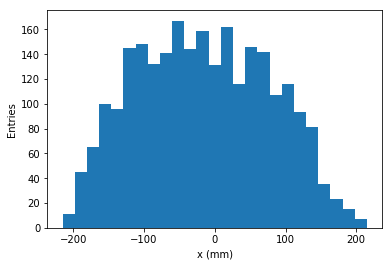

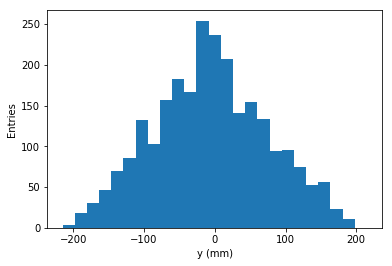

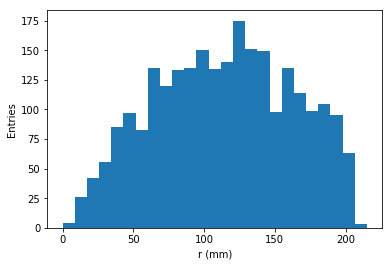

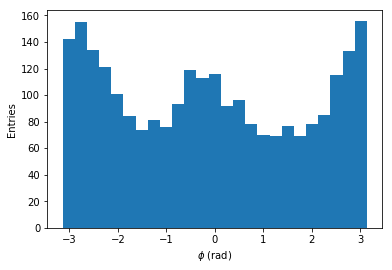

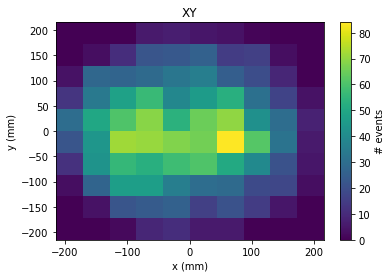

In [87]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi

hist(XR.X, 25, range=xrange)
labels("x (mm)", "Entries")


hist(XR.Y, 25, range=yrange)
labels("y (mm)", "Entries")

hist(XR.R, 25, range=rrange)
labels("r (mm)", "Entries")

hist(XR.Phi, 25, range=prange)
labels("$\phi$ (rad)", "Entries")

nevts, xs, ys, _ = \
hist2d(XR.X, XR.Y, (10, 10), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")
save("XY")

In [88]:
rfid = 100
XRfid = XR[XR.R < rfid]
print("Ratio:", len(XRfid)/len(full))
print("Ratio:", len(XRfid)/len(XR))
XRfid.head()

Ratio: 0.019010976575761004
Ratio: 0.3988919667590028


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
60,22207,1.491517e+09,1,2,225.0,28.579346,161.185127,521875.0,8.339313,1137.746338,...,688637.5,1.0,166.7625,166.7625,55.000000,25.000000,60.415230,0.426627,0.000000,0.000000
85,22238,1.491517e+09,1,2,250.0,21.733898,133.757807,578100.0,9.105875,1368.932739,...,730237.5,3.0,152.1375,152.1375,-52.123646,-27.632376,58.995107,-2.654132,4.544368,4.421186
210,22372,1.491517e+09,1,2,175.0,14.548591,72.390917,599050.0,5.962500,1750.035767,...,696087.5,2.0,97.0375,97.0375,-45.000000,50.592418,67.709621,2.297758,0.000000,5.000243
262,22427,1.491517e+09,1,2,175.0,16.660017,84.891372,593775.0,11.160000,1375.217773,...,840062.5,3.0,246.2875,246.2875,81.885186,-17.311471,83.695105,-0.208344,4.647497,4.230689
334,22502,1.491517e+09,1,2,250.0,52.666561,300.082150,631525.0,9.921250,1999.907471,...,729612.5,4.0,98.0875,98.0875,39.481495,-18.554715,43.624144,-0.439328,4.983377,4.796507


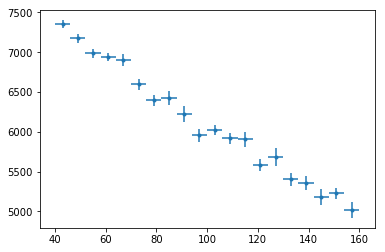

In [94]:
x, xe, y, ye  = plot_profile_histogram(XRfid.Z.values, 
                                           XRfid.S2e.values, 
                                           xr = (40,160), nbins=20)

fit values: E0 = 8426.88380471366 lifetime = -305.2758744403844
errors: E0 = 73.96624744424288 lifetime = 8.318970037016111
chi2 = 1.161623395789027


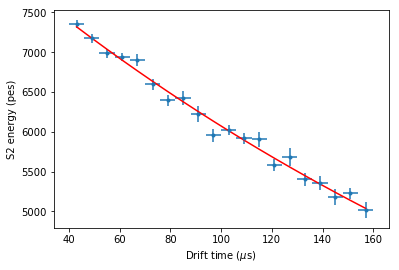

In [98]:
sel  = fitf.in_range(xp, 40, 160)
x, y = x[sel], y[sel]

f = fitf.fit(fitf.expo, x, y, (1e4, -200))
plt.errorbar(x=x, xerr=xe, y=y, yerr=ye,
                 linestyle='none', marker='.')
plt.plot(x, f.fn(x), fitOpt)
print('fit values: E0 = {} lifetime = {}'.format(f.values[0],f.values[1]))
print('errors: E0 = {} lifetime = {}'.format(f.errors[0],f.errors[1]))
print('chi2 = {}'.format(f.chi2))
labels("Drift time ($\mu$s)", "S2 energy (pes)")

In [ ]:
#('FitFunction'    , 'fn values errors chi2')):

In [100]:
zfun  = f.fn
zmin  = np.min(x)
zcorr = lambda z: zfun(zmin)/zfun(z)

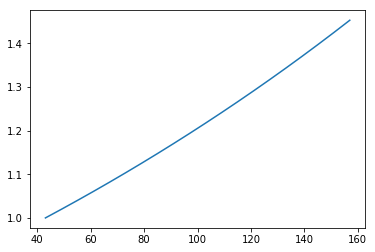

In [101]:
plt.plot(x, zcorr(x))

### Correction by attachment

In [105]:
zrange = 40, 200
shortZ = full[full.Z < 200]
fidz   = shortZ[shortZ.Z > 40]
print("Ratio:", len(fidz)/len(full))
fidz.head()

Ratio: 0.8062125155595791


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
1,22143,1.491517e+09,0,2,175.0,14.436388,73.639985,570075.0,16.071250,8490.367188,...,659187.5,19.0,89.1125,89.1125,-97.569578,22.380145,100.103414,2.916117,8.997476,9.208689
2,22143,1.491517e+09,1,2,175.0,14.436388,73.639985,570075.0,7.319375,1538.694702,...,676287.5,2.0,106.2125,106.2125,-119.837734,25.000000,122.417656,2.935927,5.021407,0.000000
3,22144,1.491517e+09,0,2,300.0,25.215143,152.466999,565475.0,19.281437,13409.538086,...,655262.5,30.0,89.7875,89.7875,54.959338,-26.589229,61.053386,-0.450602,10.232118,10.337627
4,22144,1.491517e+09,1,2,300.0,25.215143,152.466999,565475.0,8.328125,4597.053711,...,681487.5,8.0,116.0125,116.0125,36.625278,13.021865,38.871326,0.341604,6.569558,6.368801
6,22145,1.491517e+09,1,2,225.0,18.023479,106.346495,627450.0,11.661062,3512.965332,...,826112.5,7.0,198.6625,198.6625,-23.618646,14.776077,27.859880,2.582554,6.612139,6.336431


In [109]:
rfid = 100
fidzr = fidz[fidz.R < rfid]
print("Ratio:", len(fidzr)/len(full))
fidzr.head()

Ratio: 0.3686017124966995


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
3,22144,1.491517e+09,0,2,300.0,25.215143,152.466999,565475.0,19.281437,13409.538086,...,655262.5,30.0,89.7875,89.7875,54.959338,-26.589229,61.053386,-0.450602,10.232118,10.337627
4,22144,1.491517e+09,1,2,300.0,25.215143,152.466999,565475.0,8.328125,4597.053711,...,681487.5,8.0,116.0125,116.0125,36.625278,13.021865,38.871326,0.341604,6.569558,6.368801
6,22145,1.491517e+09,1,2,225.0,18.023479,106.346495,627450.0,11.661062,3512.965332,...,826112.5,7.0,198.6625,198.6625,-23.618646,14.776077,27.859880,2.582554,6.612139,6.336431
8,22147,1.491517e+09,0,1,200.0,28.056984,146.392793,475300.0,15.891250,12449.807617,...,656162.5,25.0,180.8625,180.8625,67.949012,14.509413,69.480870,0.210374,11.364282,9.705779
9,22148,1.491517e+09,0,2,275.0,51.354008,274.244767,500650.0,60.155313,10454.014648,...,659287.5,34.0,158.6375,158.6375,-4.688617,82.486083,82.619229,1.627577,15.666204,13.257184


### Z corr in fiducial (no hard cut on R)

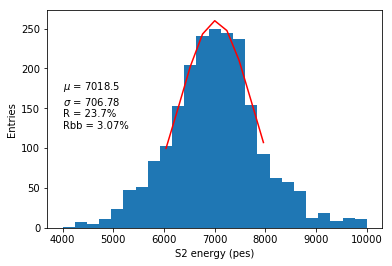

In [127]:
Erange = 4e3, 10e3
E = fidz.S2e * zcorr(fidz.Z)
y, x, _ = hist(E, 25, range=Erange)
x    = x[:-1] + np.diff(x) * 0.5
sel  = fitf.in_range(x, 6000, 8000)
x, y = x[sel], y[sel]
f    = fitf.fit(fitf.gauss, x, y, (1e3, 8e3, 200))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, gausstext(f))
labels("S2 energy (pes)", "Entries")

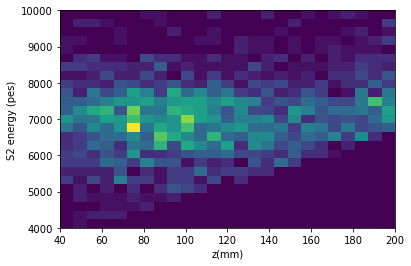

In [128]:
hist2d(fidz.Z, E, (25, 25), range=(zrange, Erange))
labels("z(mm)", "S2 energy (pes)")

### Z corr in restricted fiducial (hard cut on R)

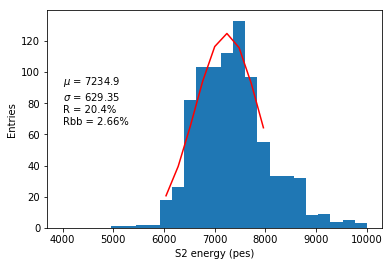

In [129]:
Erange = 4e3, 10e3
E = fidzr.S2e * zcorr(fidzr.Z)
y, x, _ = hist(E, 25, range=Erange)
x    = x[:-1] + np.diff(x) * 0.5
sel  = fitf.in_range(x, 6000, 8000)
x, y = x[sel], y[sel]
f    = fitf.fit(fitf.gauss, x, y, (1e3, 8e3, 200))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, gausstext(f))
labels("S2 energy (pes)", "Entries")

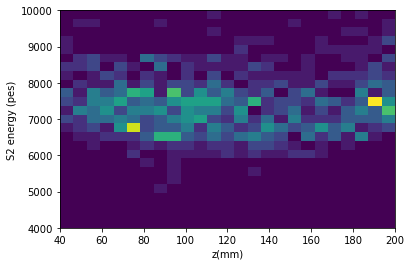

In [130]:
hist2d(fidzr.Z, E, (25, 25), range=(zrange, Erange))
labels("z(mm)", "S2 energy (pes)")

### Tracking plane

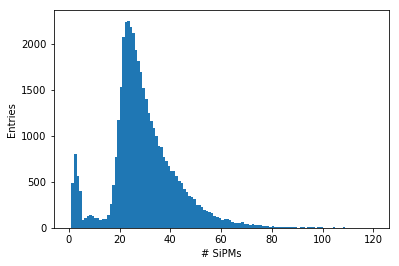

In [131]:
nrange = 0, 120

hist(fidz.Nsipm, max(nrange), nrange)
labels("# SiPMs", "Entries")

### Event distribution 

#### all events

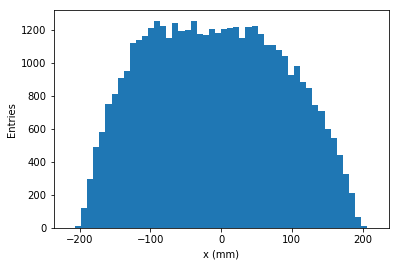

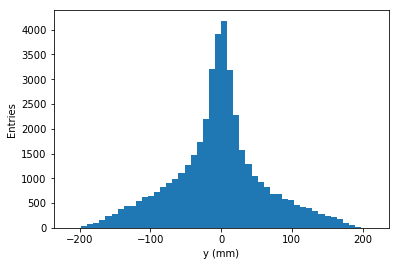

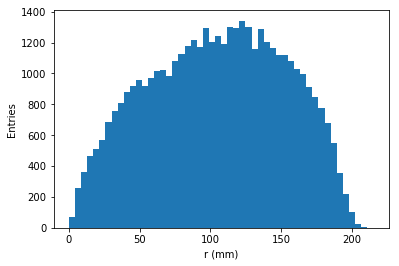

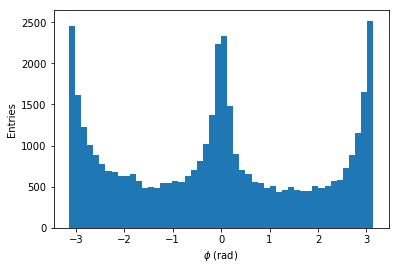

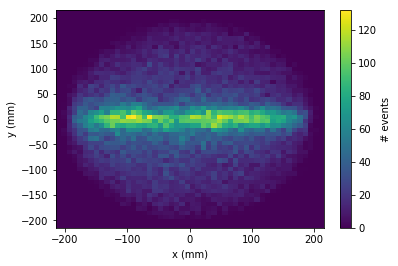

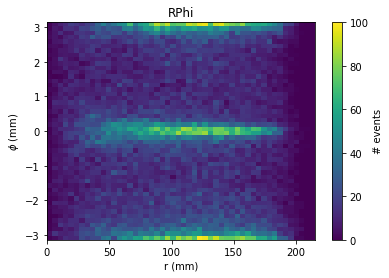

In [135]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi

hist(fidz.X, 50, range=xrange)
labels("x (mm)", "Entries")

hist(fidz.Y, 50, range=yrange)
labels("y (mm)", "Entries")

hist(fidz.R, 50, range=rrange)
labels("r (mm)", "Entries")

hist(fidz.Phi, 50, range=prange)
labels("$\phi$ (rad)", "Entries")


nevts, xs, ys, _ = \
hist2d(fidz.X, fidz.Y, (50, 50), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")

################################
hist2d(fidz.R, fidz.Phi, (50, 50), range=(rrange, prange))
plt.colorbar().set_label("# events")
labels("r (mm)", "$\phi$ (mm)")
save("RPhi")


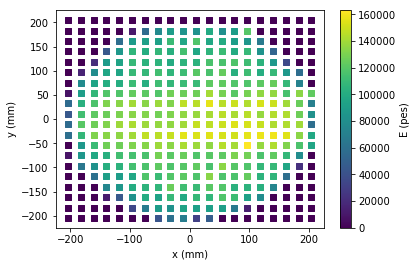

In [166]:
Erange =  4e3, 200e3

E = fidz.S2e * zcorr(fidz.Z)

pf, _, cb = profile_and_scatter(fidz.X, fidz.Y, E, (20, 20), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")

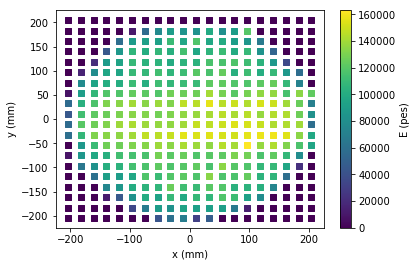

In [167]:
Erange =  4e3, 10e3

E = fidz.S2e * zcorr(fidz.Z)

pf, _, cb = profile_and_scatter(fidz.X, fidz.Y, E, (20, 20), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")

### Cut on R

In [172]:
rfid = 180
fidr = fidz[fidz.R < rfid]
print("Ratio:", len(fidr)/len(full))
fidr.head()

Ratio: 0.7681528422164384


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
1,22143,1.491517e+09,0,2,175.0,14.436388,73.639985,570075.0,16.071250,8490.367188,...,659187.5,19.0,89.1125,89.1125,-97.569578,22.380145,100.103414,2.916117,8.997476,9.208689
2,22143,1.491517e+09,1,2,175.0,14.436388,73.639985,570075.0,7.319375,1538.694702,...,676287.5,2.0,106.2125,106.2125,-119.837734,25.000000,122.417656,2.935927,5.021407,0.000000
3,22144,1.491517e+09,0,2,300.0,25.215143,152.466999,565475.0,19.281437,13409.538086,...,655262.5,30.0,89.7875,89.7875,54.959338,-26.589229,61.053386,-0.450602,10.232118,10.337627
4,22144,1.491517e+09,1,2,300.0,25.215143,152.466999,565475.0,8.328125,4597.053711,...,681487.5,8.0,116.0125,116.0125,36.625278,13.021865,38.871326,0.341604,6.569558,6.368801
6,22145,1.491517e+09,1,2,225.0,18.023479,106.346495,627450.0,11.661062,3512.965332,...,826112.5,7.0,198.6625,198.6625,-23.618646,14.776077,27.859880,2.582554,6.612139,6.336431


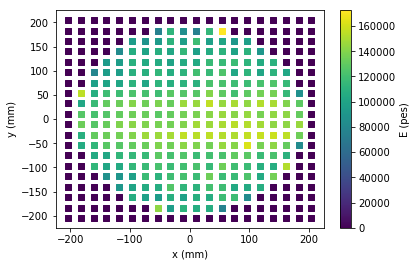

In [173]:
Erange =  4e3, 200e3

E = fidr.S2e * zcorr(fidr.Z)

pf, _, cb = profile_and_scatter(fidr.X, fidr.Y, E, (20, 20), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")

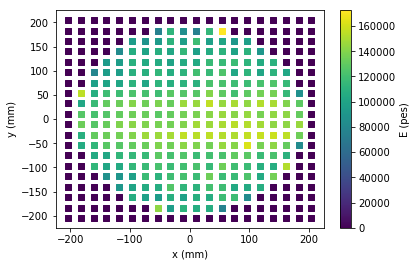

In [174]:
Erange =  60e3, 90e3

E = fidr.S2e * zcorr(fidr.Z)

pf, _, cb = profile_and_scatter(fidr.X, fidr.Y, E, (20, 20), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")

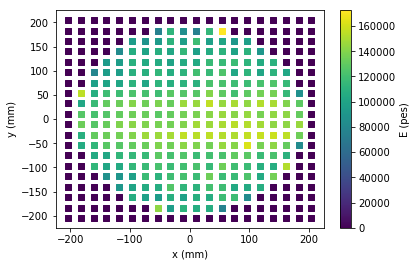

In [175]:
Erange =  4e3, 10e3

E = fidr.S2e * zcorr(fidr.Z)

pf, _, cb = profile_and_scatter(fidr.X, fidr.Y, E, (20, 20), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")

#### X rays

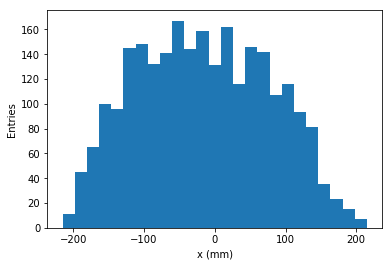

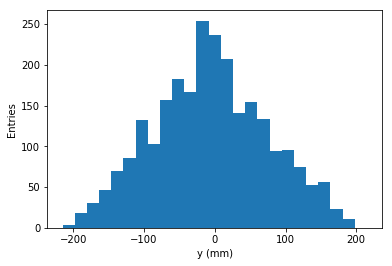

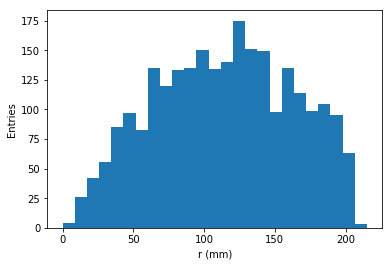

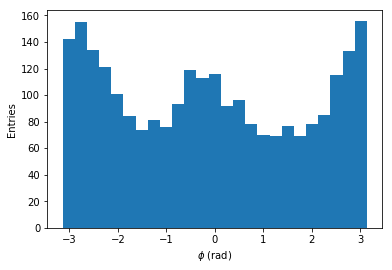

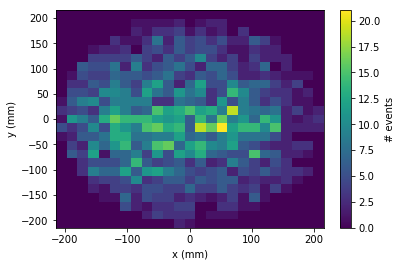

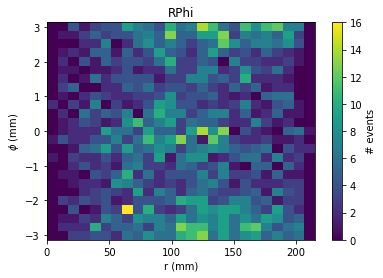

In [137]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi

hist(XR.X, 25, range=xrange)
labels("x (mm)", "Entries")

hist(XR.Y, 25, range=yrange)
labels("y (mm)", "Entries")

hist(XR.R, 25, range=rrange)
labels("r (mm)", "Entries")

hist(XR.Phi, 25, range=prange)
labels("$\phi$ (rad)", "Entries")


nevts, xs, ys, _ = \
hist2d(XR.X, XR.Y, (25, 25), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")

################################
hist2d(XR.R, XR.Phi, (25, 25), range=(rrange, prange))
plt.colorbar().set_label("# events")
labels("r (mm)", "$\phi$ (mm)")
save("RPhi")

In [141]:
yfid = 50
fidy = fidz[abs(fidz.Y) < yfid]
print("Ratio:", len(fidy)/len(full))
fidy.head()

Ratio: 0.5075063181320961


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
1,22143,1.491517e+09,0,2,175.0,14.436388,73.639985,570075.0,16.071250,8490.367188,...,659187.5,19.0,89.1125,89.1125,-97.569578,22.380145,100.103414,2.916117,8.997476,9.208689
2,22143,1.491517e+09,1,2,175.0,14.436388,73.639985,570075.0,7.319375,1538.694702,...,676287.5,2.0,106.2125,106.2125,-119.837734,25.000000,122.417656,2.935927,5.021407,0.000000
3,22144,1.491517e+09,0,2,300.0,25.215143,152.466999,565475.0,19.281437,13409.538086,...,655262.5,30.0,89.7875,89.7875,54.959338,-26.589229,61.053386,-0.450602,10.232118,10.337627
4,22144,1.491517e+09,1,2,300.0,25.215143,152.466999,565475.0,8.328125,4597.053711,...,681487.5,8.0,116.0125,116.0125,36.625278,13.021865,38.871326,0.341604,6.569558,6.368801
6,22145,1.491517e+09,1,2,225.0,18.023479,106.346495,627450.0,11.661062,3512.965332,...,826112.5,7.0,198.6625,198.6625,-23.618646,14.776077,27.859880,2.582554,6.612139,6.336431


### After y fiducial cut

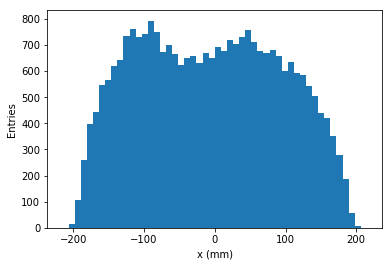

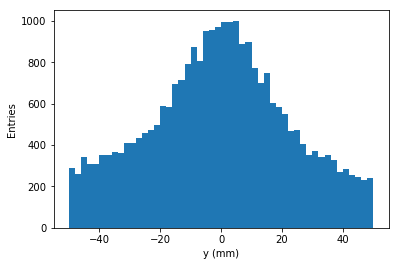

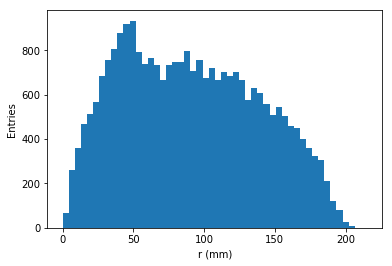

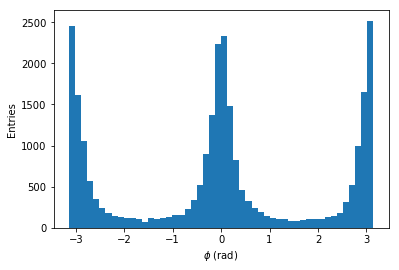

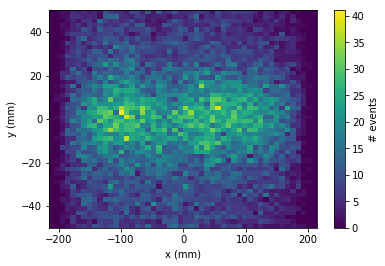

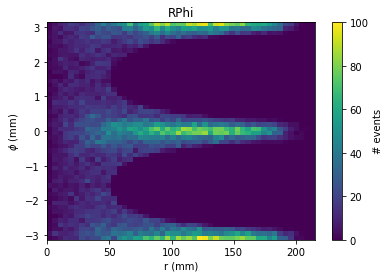

In [143]:
xrange = -215, 215
yrange = -50, 50
rrange =    0, 215
prange = - pi,  pi

hist(fidy.X, 50, range=xrange)
labels("x (mm)", "Entries")

hist(fidy.Y, 50, range=yrange)
labels("y (mm)", "Entries")

hist(fidy.R, 50, range=rrange)
labels("r (mm)", "Entries")

hist(fidy.Phi, 50, range=prange)
labels("$\phi$ (rad)", "Entries")


nevts, xs, ys, _ = \
hist2d(fidy.X, fidy.Y, (50, 50), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")

################################
hist2d(fidy.R, fidy.Phi, (50, 50), range=(rrange, prange))
plt.colorbar().set_label("# events")
labels("r (mm)", "$\phi$ (mm)")
save("RPhi")

### X Rays

In [147]:
XRyfid = 150
XRxfid = 150
fidyXR = XR[abs(XR.Y) < XRyfid]
fidXR = fidyXR[abs(fidyXR.X) < XRxfid]
print("Ratio:", len(fidXR)/len(full))
print("Ratio wr XR:", len(fidXR)/len(XR))
fidXR.head()

Ratio: 0.039606201199502096
Ratio wr XR: 0.8310249307479224


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
2,22143,1.491517e+09,1,2,175.0,14.436388,73.639985,570075.0,7.319375,1538.694702,...,676287.5,2.0,106.2125,106.2125,-119.837734,25.000000,122.417656,2.935927,5.021407,0.000000
54,22198,1.491517e+09,1,2,150.0,11.873551,59.949914,587200.0,6.821875,2016.625488,...,675637.5,3.0,88.4375,88.4375,-108.665341,-3.063693,108.708521,-3.113406,4.834143,3.964192
60,22207,1.491517e+09,1,2,225.0,28.579346,161.185127,521875.0,8.339313,1137.746338,...,688637.5,1.0,166.7625,166.7625,55.000000,25.000000,60.415230,0.426627,0.000000,0.000000
85,22238,1.491517e+09,1,2,250.0,21.733898,133.757807,578100.0,9.105875,1368.932739,...,730237.5,3.0,152.1375,152.1375,-52.123646,-27.632376,58.995107,-2.654132,4.544368,4.421186
126,22281,1.491517e+09,1,2,225.0,27.146255,142.006234,517700.0,10.355562,962.683411,...,712112.5,2.0,194.4125,194.4125,100.789301,-35.000000,106.693407,-0.334231,4.963114,0.000000


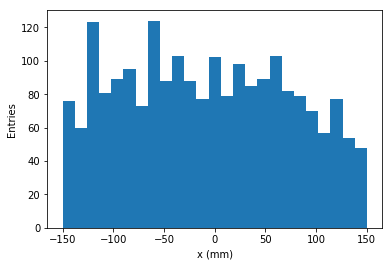

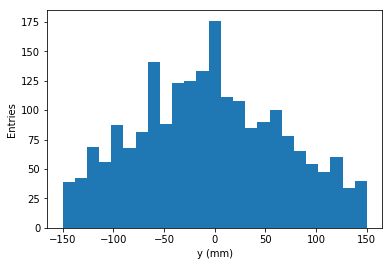

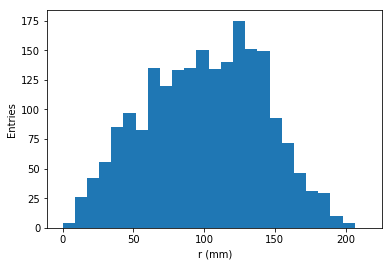

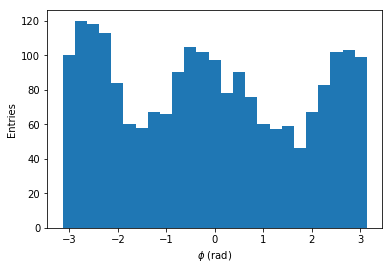

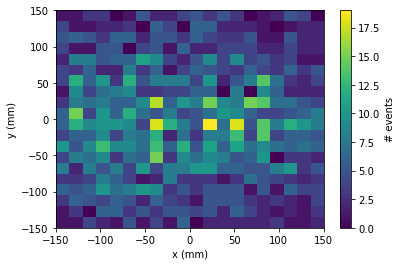

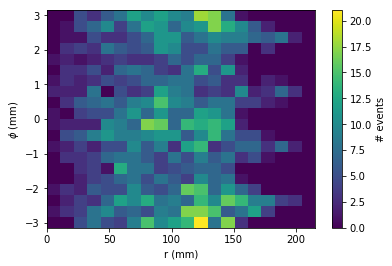

In [159]:
xrange = -150, 150
yrange = -150, 150
rrange =    0, 215
prange = - pi,  pi
bins = 25

hist(fidXR.X, bins, range=xrange)
labels("x (mm)", "Entries")

hist(fidXR.Y, bins, range=yrange)
labels("y (mm)", "Entries")

hist(fidXR.R, bins, range=rrange)
labels("r (mm)", "Entries")

hist(fidXR.Phi, bins, range=prange)
labels("$\phi$ (rad)", "Entries")


nevts, xs, ys, _ = \
hist2d(fidXR.X, fidXR.Y, (20, 20), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")

################################
hist2d(fidXR.R, fidXR.Phi, (20, 20), range=(rrange, prange))
plt.colorbar().set_label("# events")
labels("r (mm)", "$\phi$ (mm)")

### Energy vs XY

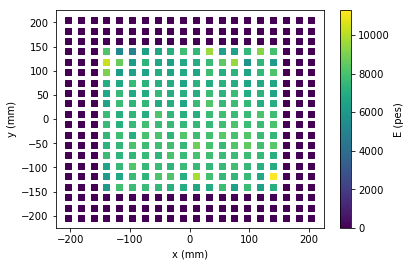

In [160]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  4e3, 9e3

E = fidXR.S2e * zcorr(fidXR.Z)

pf, _, cb = profile_and_scatter(fidXR.X, fidXR.Y, E, (20, 20), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")

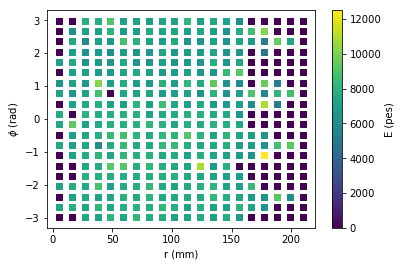

In [155]:
_, _, cb = profile_and_scatter(fidXR.R, fidXR.Phi, E, (20, 20), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")

In [156]:
XRrfid1 = 20
XRxfid2 = 160
fidyXR = XR[abs(XR.Y) < XRyfid]
fidXR = fidyXR[abs(fidyXR.X) < XRxfid]
fidr1XR = fidXR[abs(fidXR.R) > XRrfid1]
fidrXR = fidr1XR[abs(fidr1XR.R) < XRxfid2]
print("Ratio:", len(fidrXR)/len(full))
print("Ratio wr XR:", len(fidrXR)/len(XR))
fidrXR.head()

Ratio: 0.03621138395383049
Ratio wr XR: 0.7597942223981005


,event,time,peak,nS2,S1w,S1h,S1e,S1t,S2w,S2h,...,S2t,Nsipm,DT,Z,X,Y,R,Phi,Xrms,Yrms
2,22143,1.491517e+09,1,2,175.0,14.436388,73.639985,570075.0,7.319375,1538.694702,...,676287.5,2.0,106.2125,106.2125,-119.837734,25.000000,122.417656,2.935927,5.021407,0.000000
54,22198,1.491517e+09,1,2,150.0,11.873551,59.949914,587200.0,6.821875,2016.625488,...,675637.5,3.0,88.4375,88.4375,-108.665341,-3.063693,108.708521,-3.113406,4.834143,3.964192
60,22207,1.491517e+09,1,2,225.0,28.579346,161.185127,521875.0,8.339313,1137.746338,...,688637.5,1.0,166.7625,166.7625,55.000000,25.000000,60.415230,0.426627,0.000000,0.000000
85,22238,1.491517e+09,1,2,250.0,21.733898,133.757807,578100.0,9.105875,1368.932739,...,730237.5,3.0,152.1375,152.1375,-52.123646,-27.632376,58.995107,-2.654132,4.544368,4.421186
126,22281,1.491517e+09,1,2,225.0,27.146255,142.006234,517700.0,10.355562,962.683411,...,712112.5,2.0,194.4125,194.4125,100.789301,-35.000000,106.693407,-0.334231,4.963114,0.000000


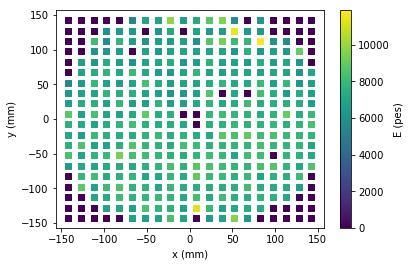

In [157]:
xrange = -150, 150
yrange = -150, 150
rrange =    20, 160
prange = - pi,  pi
Erange =  4e3, 9e3

E = fidrXR.S2e * zcorr(fidrXR.Z)

pf, _, cb = profile_and_scatter(fidrXR.X, fidrXR.Y, E, (20, 20), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")

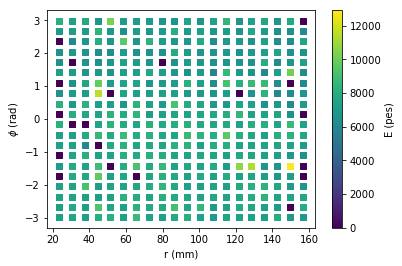

In [158]:
_, _, cb = profile_and_scatter(fidrXR.R, fidrXR.Phi, E, (20, 20), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")

In [ ]:
XRrfid1 = 10
XRxfid2 = 100
fidyXR = XR[abs(XR.Y) < XRyfid]
fidXR = fidyXR[abs(fidyXR.X) < XRxfid]
fidr1XR = fidXR[abs(fidXR.R) > XRrfid1]
fidrXR = fidr1XR[abs(fidr1XR.R) < XRxfid2]
print("Ratio:", len(fidrXR)/len(full))
print("Ratio wr 

In [ ]:


hist2d(XR.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(XR.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(XR.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")

def get_xycorr(xs, ys, es, eref=None):
    if eref is None:
        eref = es[es.shape[0]//2, es.shape[1]//2]
    xs   = xs.reshape(xs.size, 1)
    ys   = ys.reshape(ys.size, 1)
    print(eref)
    def xycorr(x, y):
        x_closest = np.apply_along_axis(np.argmin, 0, abs(x-xs))
        y_closest = np.apply_along_axis(np.argmin, 0, abs(y-ys))
        e = es[x_closest, y_closest]
        e[e<1e3] = eref
        return eref/ e
    return xycorr
xycorr = get_xycorr(*pf[:-1])

In [ ]:
x    = x[:-1] + np.diff(x) * 0.5
sel  = fitf.in_range(x, 6000, 8500)
x, y = x[sel], y[sel]
f    = fitf.fit(fitf.gauss, x, y, (1e3, 8e3, 200))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, gausstext(f.values))


hist2d(shortZfid.Z, E, (50, 50), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZfid.Z, E, 30, xrange=zrange, yrange=Erange)
plt.plot(x, y, profOpt)

sel  = fitf.in_range(x, 75, 150)
x, y = x[sel], y[sel]
f    = fitf.fit(fitf.expo, x, y, (1e4, -200))
plt.plot(x, f.fn(x), fitOpt)

print(f.values)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
save("S2energyCorrvsZ_fiducial")

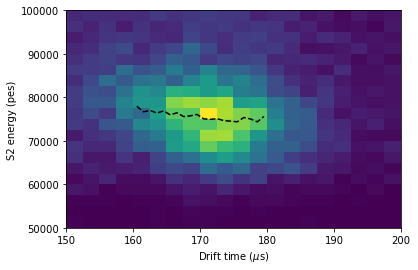

In [54]:
Erange = 50e3, 100e3
zrange = 150, 200
pErange = 60e3, 90e3
pZrange = 160, 180

hist2d(shortZ.Z, shortZ.S2e, (20, 20), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S2e, 20, xrange=pZrange, yrange=pErange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")
#save("S2energyvsZ")

In [69]:
minE = shortZ[shortZ.S2e > 60000]

In [70]:
rangeE = minE[minE.S2e < 90000]

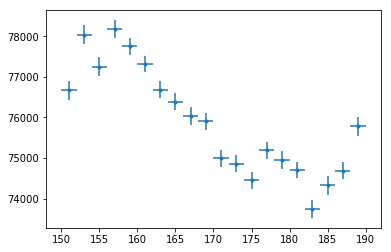

In [72]:
plot_profile_histogram(rangeE.Z.values, rangeE.S2e.values, xr = (150,190), nbins=20)

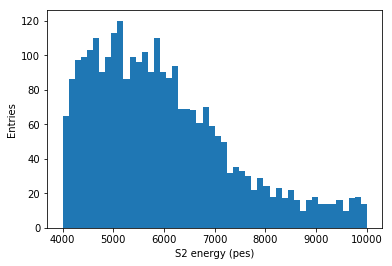

In [78]:
n, bins, patches  = hist(shortZ.S2e, 50, (4e3,10e+3))
labels("S2 energy (pes)", "Entries")

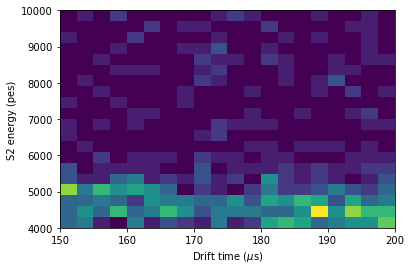

In [80]:
Erange = 4e3, 10e3
zrange = 150, 200

hist2d(shortZ.Z, shortZ.S2e, (20, 20), range=(zrange, Erange))
labels("Drift time ($\mu$s)", "S2 energy (pes)")

# S2 width

In [ ]:
zrange = 0, 200
wrange = 5, 15

hist(shortZ.S2w, 20)
labels("S2 width ($\mu$s)", "Entries")
#save("S2width")

#hist2d(shortZ.Z, shortZ.S2w*1e-3, (50, 20), range=(zrange, wrange))
#x, y, _ = fitf.profileX(shortZ.Z, shortZ.S2w*1e-3, 30, xrange=zrange, yrange=wrange)
#plt.plot(x, y, profOpt)

#labels("Drift time ($\mu$s)", "S2 energy (pes)")
#save("S2widthvsZ")

# S2 height

In [ ]:
zrange = 0, 200
hrange = 0, 40e3

hist(shortZ.S2h, 30, range=hrange)
labels("S2 height (pes)", "Entries")
#save("S2height")

#hist2d(shortZ.Z, shortZ.S2h, (50, 30), range=(zrange, hrange))
#x, y, _ = fitf.profileX(shortZ.Z, shortZ.S2h, 30, xrange=zrange, yrange=hrange)
#plt.plot(x, y, profOpt)

#labels("Drift time ($\mu$s)", "S2 height (pes)")
#save("S2heightvsZ")

# S2 peak to area ratio

In [ ]:
zrange = 0, 200
rrange = 0, 0.5

S2r = shortZ.S2h/shortZ.S2e

hist(S2r, 50, range=rrange)
labels("Height/Area", "Entries")
#save("S2Peak2Area")

#hist2d(shortZ.Z, S2r, (50, 50), range=(zrange, rrange))
#x, y, _ = fitf.profileX(shortZ.Z, S2r, 30, xrange=zrange, yrange=rrange)
#plt.plot(x, y, profOpt)

#labels("Drift time ($\mu$s)", "Height/Area")
#save("S2ratiovsZ")

# S2 vs S1

In [ ]:
Srange = 0, 20
Erange = 0, 3e5

S = shortZ.S1e
E = shortZ.S2e

hist2d(S, E, (50, 50), range=(Srange, Erange))
x, y, _ = fitf.profileX(S, E, 30, xrange=Srange, yrange=Erange)
plt.plot(x, y, profOpt)

sel = fitf.in_range(S, *Srange) & fitf.in_range(E, *Erange)
c = covariance(S[sel], E[sel])
print(*c)
labels("S1 energy (pes)", "S2 energy (pes)")
save("S2vsS1")

In [ ]:
zrange = 0, 200
Rrange = 0, 0.006

S12r = shortZ.S1e/shortZ.S2e

hist(S12r, 50, range=Rrange)
labels("S1/S2", "Entries")
save("S12ratio")

hist2d(shortZ.Z, S12r, (50, 50), range=(zrange, Rrange))
x, y, _ = fitf.profileX(shortZ.Z, S12r, 30, xrange=zrange, yrange=Rrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S1/S2")
save("S12ratiovsZ")

# Temporary fiducialization

In [ ]:
shortZfid = shortZ[shortZ.R < 100]
print("Ratio:", len(shortZfid)/len(full))
print("Ratio:", len(shortZfid)/len(shortZ))
shortZfid.head()

# S2 energy fiducialized

In [ ]:
zrange = 0,200
Erange = 0e3, 200e3

hist(shortZfid.S2e, 50, range=Erange)
labels("S2 energy (pes)", "Entries")
#save("S2energy_fiducial")



In [ ]:
Erange = 50e3, 80e3
zrange = 100, 200
pErange = 55e3, 70e3
pZrange = 160, 180

hist2d(shortZ.Z/units.mus, shortZ.S2e, (20, 20), range=(zrange, Erange))
x, y, _ = fitf.profileX(shortZ.Z/units.mus, shortZ.S2e, 20, xrange=pZrange, yrange=pErange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 energy (pes)")

In [ ]:
sel  = fitf.in_range(x, 160, 180)
x, y = x[sel], y[sel]

f = fitf.fit(fitf.expo, x, y, (1e4, -200))
plt.plot(x, f.fn(x), fitOpt)
print(f.values)
labels("Drift time ($\mu$s)", "S2 energy (pes)")
#save("S2energyvsZ_fiducial")

zfun  = f.fn
zmin  = np.min(x)
zcorr = lambda z: zfun(zmin)/zfun(z)

# Correction by attachment

In [ ]:
Erange = 1e3, 200e3
E = shortZfid.S2e * zcorr(shortZfid.Z/units.mus)
y, x, _ = hist(E, 50, range=Erange)

In [ ]:
Erange = 50e3, 100e3
E = shortZfid.S2e * zcorr(shortZfid.Z/units.mus)
y, x, _ = hist(E, 25, range=Erange)

In [ ]:
x    = x[:-1] + np.diff(x) * 0.5
sel  = fitf.in_range(x, 65e3, 75e3)
x, y = x[sel], y[sel]
f    = fitf.fit(fitf.gauss, x, y, (1e3, 7e4, 2000))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, gausstext(f.values))

labels("S2 energy (pes)", "Entries")

In [ ]:
Erange = 50e3, 100e3
E = shortZfid.S2e * zcorr(shortZfid.Z/units.mus)

y, x, _ = hist(E, 50, range=Erange)

x    = x[:-1] + np.diff(x) * 0.5
sel  = fitf.in_range(x, 62e3, 72e3)
x, y = x[sel], y[sel]
f    = fitf.fit(fitf.gauss, x, y, (1e3, 7e4, 2000))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, gausstext(f.values))

labels("S2 energy (pes)", "Entries")



In [ ]:
Erange2 = 140e3, 170e3

# Tracking

In [ ]:
nrange = 0, 12
zrange = 0, 600

hist(shortZ.Nsipm, max(nrange), nrange)
labels("# SiPMs", "Entries")
save("Nsipm")

hist2d(shortZ.Z/units.mus, shortZ.Nsipm, (30, max(nrange)), range=(zrange, nrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.Nsipm, 30, xrange=zrange, yrange=nrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "# SiPMs")
#save("NsipmvsZ")


# Event distribution

In [ ]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi

hist(shortZ.X, 50, range=xrange)
labels("x (mm)", "Entries")
save("X")

hist(shortZ.Y, 50, range=yrange)
labels("y (mm)", "Entries")
save("Y")

hist(shortZ.R, 50, range=rrange)
labels("r (mm)", "Entries")
save("R")

hist(shortZ.Phi, 50, range=prange)
labels("$\phi$ (rad)", "Entries")
save("Phi")

nevts, xs, ys, _ = \
hist2d(shortZ.X, shortZ.Y, (50, 50), range=(xrange, yrange))
plt.colorbar().set_label("# events")
labels("x (mm)", "y (mm)")
save("XY")

################################
hist2d(shortZ.R, shortZ.Phi, (50, 50), range=(rrange, prange))
plt.colorbar().set_label("# events")
labels("r (mm)", "$\phi$ (mm)")
save("RPhi")

# Tracking charge

In [ ]:
zrange = 0, 200
Qrange = 0, 500

hist(shortZ.S2q, 100, range=Qrange)
labels("S2 charge (pes)", "Entries")
save("S2charge")

hist2d(shortZ.Z, shortZ.S2q, (50, 100), range=(zrange, Qrange))
x, y, _ = fitf.profileX(shortZ.Z, shortZ.S2q, 30, xrange=zrange, yrange=Qrange)
plt.plot(x, y, profOpt)

labels("Drift time ($\mu$s)", "S2 charge (pes)")
save("S2chargevsZ")

In [ ]:
xrange = -215, 215
yrange = -50, 50
rrange =    0, 215
prange = - pi,  pi
Qrange =    0, 500

_, _, cb = profile_and_scatter(shortZ.X, shortZ.Y, shortZ.S2q, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("Q (pes)")
labels("x (mm)", "y (mm)")
save("QvsXY")

_, _, cb = profile_and_scatter(shortZ.R, shortZ.Phi, shortZ.S2q, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("Q (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("QvsRPhi")

hist2d(shortZ.R, shortZ.S2q, (50, 50), range=(rrange, Qrange))
x, y, _ = fitf.profileX(shortZ.R, shortZ.S2q, 50, xrange=rrange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 charge (pes)")
save("QvsR")

hist2d(shortZ.Phi, shortZ.S2q, (50, 50), range=(prange, Qrange))
x, y, _ = fitf.profileX(shortZ.Phi, shortZ.S2q, 50, xrange=prange, yrange=Qrange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 charge (pes)")
save("QvsPhi")


# Energy vs position

In [ ]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  4e3, 9e3

E = shortZ.S2e * zcorr(shortZ.Z)

pf, _, cb = profile_and_scatter(shortZ.X, shortZ.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(shortZ.R, shortZ.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(shortZ.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(shortZ.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(shortZ.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(shortZ.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")

def get_xycorr(xs, ys, es, eref=None):
    if eref is None:
        eref = es[es.shape[0]//2, es.shape[1]//2]
    xs   = xs.reshape(xs.size, 1)
    ys   = ys.reshape(ys.size, 1)
    print(eref)
    def xycorr(x, y):
        x_closest = np.apply_along_axis(np.argmin, 0, abs(x-xs))
        y_closest = np.apply_along_axis(np.argmin, 0, abs(y-ys))
        e = es[x_closest, y_closest]
        e[e<1e3] = eref
        return eref/ e
    return xycorr
xycorr = get_xycorr(*pf[:-1])


# Correction by attachment and position

In [ ]:
xrange = -215, 215
yrange = -215, 215
rrange =    0, 215
prange = - pi,  pi
Erange =  4e3, 11e3

E  = shortZ.S2e * zcorr(shortZ.Z) * xycorr(shortZ.X.values, shortZ.Y.values)

y, x, _ = hist(E, 100, Erange)

x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e5, 1e4, 1e2))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, gausstext(f.values))

labels("E (pes)", "Entries")
save("EcorrZXY")

_, _, cb = profile_and_scatter(shortZ.X, shortZ.Y, E, (50, 50), xrange=xrange, yrange=yrange)
cb.set_label("E (pes)")
labels("x (mm)", "y (mm)")
save("EvsXY")

_, _, cb = profile_and_scatter(shortZ.R, shortZ.Phi, E, (50, 50), xrange=rrange, yrange=prange)
cb.set_label("E (pes)")
labels("r (mm)", "$\phi$ (rad)")
save("EvsRPhi")

hist2d(shortZ.R, E, (50, 50), range=(rrange, Erange), weights=E)
x, y, _ = fitf.profileX(shortZ.R, E, 50, xrange=rrange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("r (mm)", "S2 energy (pes)")
save("EvsR")

hist2d(shortZ.Phi, E, (50, 50), range=(prange, Erange), weights=E)
x, y, _ = fitf.profileX(shortZ.Phi, E, 50, xrange=prange, yrange=Erange)
plt.plot(x, y, profOpt)
labels("phi (rad)", "S2 energy (pes)")
save("EvsPhi")


In [ ]:
E = shortZ.S2e * zcorr(shortZ.Z) * xycorr(shortZ.X.values, shortZ.Y.values)
T = (shortZ.time - np.min(shortZ.time))/60

Erange = 4e3, 11e3
Trange =   0, 1800

hist2d(T, E, (50, 50), range=(Trange, Erange))

x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

labels("Time (min)", "Energy (pes)")

def get_timecorr(T, E):
    eref = np.max(E)
    def timecorr(t):
        dt = np.abs(t[:, np.newaxis]-T)
        return eref / E[np.apply_along_axis(np.argmin, 1, dt)]
    return timecorr
tcorr = get_timecorr(x, y)

In [ ]:
T = (shortZ.time - np.min(shortZ.time))/60
E = shortZ.S2e * zcorr(shortZ.Z) * xycorr(shortZ.X.values, shortZ.Y.values) * tcorr(T)

Trange =   0, 1800
Erange = 4e3, 11e3

y, x, _ = hist(E, 100, Erange)

x = x[:-1] + np.diff(x) * 0.5
f = fitf.fit(fitf.gauss, x, y, (1e5, 1e4, 1e2))
plt.plot(x, f.fn(x), fitOpt)
plt.text(Erange[0], max(y)/2, gausstext(f.values))

labels("E (pes)", "Entries")
save("EcorrZXYT")

hist2d(T, E, (50, 50), range=(Trange, Erange))
x, y, _ = fitf.profileX(T, E, 50, Trange)
plt.plot(x, y, profOpt)

labels("Time (min)", "Energy (pes)")
